# เราจะมาลองดูกันว่า seller จะมี retention มากกว่าหรือปล่าว

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sellers = pd.read_csv('OLIST-DATA\olist_sellers_dataset.csv')
orders = pd.read_csv('OLIST-DATA/olist_orders_dataset.csv')
geolocation_replace = pd.read_csv('geolocation_mean_replace_geolocation_dataset.csv')
order_items = pd.read_csv('OLIST-DATA/olist_order_items_dataset.csv')

In [3]:
geo = geolocation_replace.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix'})

merged = (
    sellers
    .merge(order_items, on='seller_id', how='left')
    .merge(orders, on='order_id', how='left')
    .merge(geo, on='seller_zip_code_prefix', how='left')
)

merged

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat_mean,geolocation_lng_mean,geolocation_lat_std,geolocation_lng_std
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,-22.893848,-47.061337,0.003859,0.004621
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,-22.893848,-47.061337,0.003859,0.004621
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,-22.893848,-47.061337,0.003859,0.004621
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,-22.383437,-46.947927,0.006931,0.006135
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,...,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03 00:00:00,-22.383437,-46.947927,0.006931,0.006135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.00,16.05,...,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-03 14:01:24,2017-03-06 15:34:28,2017-03-28 00:00:00,-31.751072,-52.323202,0.006777,0.006501
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.00,10.96,...,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-10 07:07:56,2017-02-13 11:09:12,2017-03-10 00:00:00,-31.751072,-52.323202,0.006777,0.006501
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.00,16.05,...,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-05 09:53:19,2017-04-10 16:37:06,2017-05-03 00:00:00,-31.751072,-52.323202,0.006777,0.006501
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.00,12.48,...,canceled,2017-06-16 17:21:21,2017-06-16 17:30:16,NaN,NaN,2017-07-10 00:00:00,-31.751072,-52.323202,0.006777,0.006501


In [4]:
merged.isna().sum()

seller_id                           0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
order_id                            0
order_item_id                       0
product_id                          0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
geolocation_lat_mean              253
geolocation_lng_mean              253
geolocation_lat_std               589
geolocation_lng_std               589
dtype: int64

In [5]:
merged.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'geolocation_lat_mean',
       'geolocation_lng_mean', 'geolocation_lat_std', 'geolocation_lng_std'],
      dtype='object')

In [6]:
# parse purchase timestamp and extract year, month, day
merged['order_purchase_datetime'] = pd.to_datetime(merged['order_purchase_timestamp'], errors='coerce')
merged['order_purchase_year'] = merged['order_purchase_datetime'].dt.year
merged['order_purchase_month'] = merged['order_purchase_datetime'].dt.month
merged['order_purchase_day'] = merged['order_purchase_datetime'].dt.day

# quick check
merged[['order_purchase_timestamp','order_purchase_datetime','order_purchase_year','order_purchase_month','order_purchase_day']]

,order_purchase_timestamp,order_purchase_datetime,order_purchase_year,order_purchase_month,order_purchase_day
0,2017-08-21 20:35:44,2017-08-21 20:35:44,2017,8,21
1,2017-05-05 16:12:29,2017-05-05 16:12:29,2017,5,5
2,2017-08-30 11:47:52,2017-08-30 11:47:52,2017,8,30
3,2017-11-10 16:54:13,2017-11-10 16:54:13,2017,11,10
4,2017-09-28 19:31:57,2017-09-28 19:31:57,2017,9,28
...,...,...,...,...,...
112645,2017-03-01 02:16:01,2017-03-01 02:16:01,2017,3,1
112646,2017-02-09 16:42:59,2017-02-09 16:42:59,2017,2,9
112647,2017-04-03 17:54:02,2017-04-03 17:54:02,2017,4,3
112648,2017-06-16 17:21:21,2017-06-16 17:21:21,2017,6,16


In [7]:
orders = (
    merged[['seller_id', 'order_purchase_datetime']]
    .dropna()
    .sort_values(['seller_id', 'order_purchase_datetime'])
)

orders['prev_purchase'] = (
    orders.groupby('seller_id')['order_purchase_datetime']
    .shift(1)
)

orders['days_since_prev'] = (
    orders['order_purchase_datetime'] - orders['prev_purchase']
).dt.total_seconds() / 86400

orders

,seller_id,order_purchase_datetime,prev_purchase,days_since_prev
107900,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,NaT,NaN
107899,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-12 13:33:22,2017-09-26 22:17:05,15.636308
107898,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,2017-10-12 13:33:22,5.780000
40361,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,NaT,NaN
40522,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18 23:26:24,2017-02-04 19:06:04,14.180787
...,...,...,...,...
84044,ffff564a4f9085cd26170f4732393726,2017-03-16 14:15:16,2017-03-15 10:30:17,1.156238
84041,ffff564a4f9085cd26170f4732393726,2017-03-24 00:24:17,2017-03-16 14:15:16,7.422928
84035,ffff564a4f9085cd26170f4732393726,2017-03-25 14:49:56,2017-03-24 00:24:17,1.601146
84031,ffff564a4f9085cd26170f4732393726,2017-03-29 19:56:47,2017-03-25 14:49:56,4.213090


In [8]:
intervals = (
    orders
    .dropna(subset=['days_since_prev'])
    .loc[orders['days_since_prev'] > 0, ['days_since_prev']]
    .copy()
)

intervals

,days_since_prev
107899,15.636308
107898,5.780000
40522,14.180787
40412,4.511273
40488,4.194942
...,...
84044,1.156238
84041,7.422928
84035,1.601146
84031,4.213090


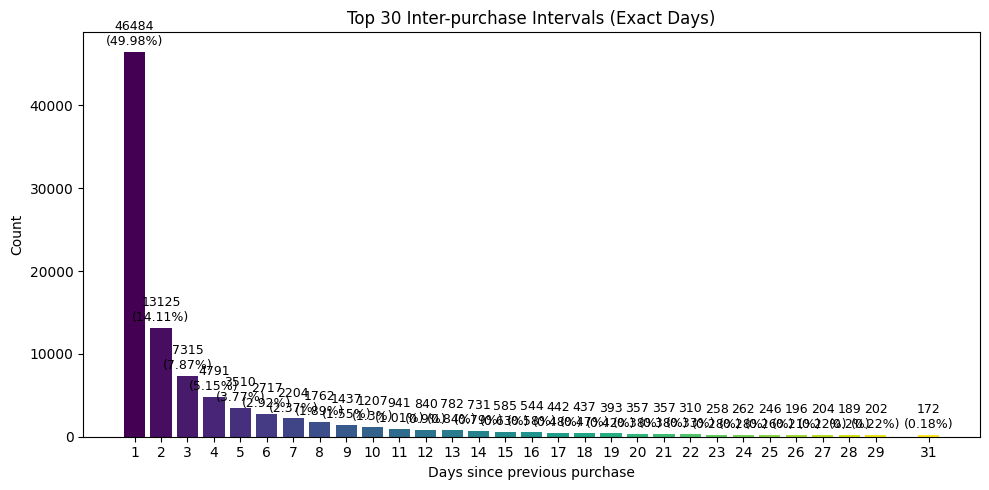

In [9]:
orders = (
    merged[['seller_id', 'order_purchase_datetime']]
    .dropna()
    .sort_values(['seller_id', 'order_purchase_datetime'])
)

orders['prev_purchase'] = (
    orders.groupby('seller_id')['order_purchase_datetime']
    .shift(1)
)

orders['days_since_prev'] = (
    orders['order_purchase_datetime'] - orders['prev_purchase']
).dt.total_seconds() / 86400

intervals = (
    orders
    .dropna(subset=['days_since_prev'])
    .loc[orders['days_since_prev'] > 0, ['days_since_prev']]
    .copy()
)

intervals['days_since_prev'] = np.ceil(intervals['days_since_prev']).astype(int)


TOP_N = 30

dist_counts = intervals['days_since_prev'].value_counts()
top_counts = dist_counts.head(TOP_N).sort_index()   

top_pct = (top_counts / top_counts.sum() * 100).round(2)

x = top_counts.index.values

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    x,
    top_counts.values,
    width=0.8,
    color=plt.cm.viridis(np.linspace(0, 1, len(x)))
)

ax.set_xticks(x)
ax.set_xlabel('Days since previous purchase')
ax.set_ylabel('Count')
ax.set_title(f'Top {TOP_N} Inter-purchase Intervals (Exact Days)')

y_offset = top_counts.max() * 0.01
for xi, c, p in zip(x, top_counts.values, top_pct.values):
    ax.text(xi, c + y_offset, f"{c}\n({p}%)", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

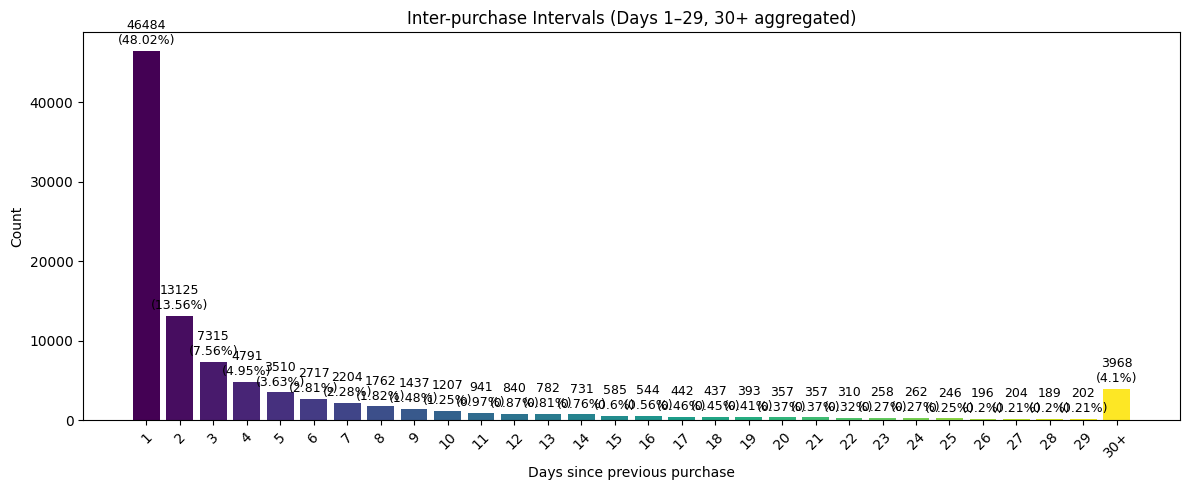

In [10]:
CUTOFF_DAY = 30

orders = (
    merged[['seller_id', 'order_purchase_datetime']]
    .dropna()
    .sort_values(['seller_id', 'order_purchase_datetime'])
)

orders['prev_purchase'] = orders.groupby('seller_id')['order_purchase_datetime'].shift(1)

orders['days_since_prev'] = (
    (orders['order_purchase_datetime'] - orders['prev_purchase']).dt.total_seconds() / 86400.0
)

intervals = (
    orders
    .dropna(subset=['days_since_prev'])
    .loc[orders['days_since_prev'] > 0, ['days_since_prev']]
    .copy()
)

intervals['days_since_prev'] = np.ceil(intervals['days_since_prev']).astype(int)

dist_counts = intervals['days_since_prev'].value_counts().sort_index()

exact_range = range(1, CUTOFF_DAY)
exact_counts = dist_counts.reindex(exact_range, fill_value=0).astype(int)

tail_count = int(dist_counts[dist_counts.index >= CUTOFF_DAY].sum())

final_counts = exact_counts.copy()
final_counts.loc[f'{CUTOFF_DAY}+'] = tail_count

final_pct = (final_counts / final_counts.sum() * 100).round(2)

x_labels = final_counts.index.astype(str)
x_pos = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(
    x_pos,
    final_counts.values,
    color=plt.cm.viridis(np.linspace(0, 1, len(x_pos)))
)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_xlabel('Days since previous purchase')
ax.set_ylabel('Count')
ax.set_title(f'Inter-purchase Intervals (Days 1–{CUTOFF_DAY-1}, {CUTOFF_DAY}+ aggregated)')

y_offset = final_counts.max() * 0.01 if final_counts.max() > 0 else 0.1
for i, (c, p) in enumerate(zip(final_counts.values, final_pct.values)):
    ax.text(
        i,
        c + y_offset,
        f"{c}\n({p}%)",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


# จะเห็นได้ว่ายอดขาย ~ 50 % มีการขายซ้ำได้ในวันถัด ๆ ไป

In [15]:
orders

,seller_id,order_purchase_datetime,prev_purchase,days_since_prev
107900,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,NaT,NaN
107899,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-12 13:33:22,2017-09-26 22:17:05,15.636308
107898,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,2017-10-12 13:33:22,5.780000
40361,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,NaT,NaN
40522,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18 23:26:24,2017-02-04 19:06:04,14.180787
...,...,...,...,...
84044,ffff564a4f9085cd26170f4732393726,2017-03-16 14:15:16,2017-03-15 10:30:17,1.156238
84041,ffff564a4f9085cd26170f4732393726,2017-03-24 00:24:17,2017-03-16 14:15:16,7.422928
84035,ffff564a4f9085cd26170f4732393726,2017-03-25 14:49:56,2017-03-24 00:24:17,1.601146
84031,ffff564a4f9085cd26170f4732393726,2017-03-29 19:56:47,2017-03-25 14:49:56,4.213090


In [ ]:
seller_max_diff = (
    orders
    .loc[orders['days_since_prev'] > 0]   # exclude 0-day intervals
    .groupby('seller_id')['days_since_prev']
    .max()
    .pipe(np.ceil)
    .astype(int)
    .reset_index(name='max_days_since_prev')
)

seller_max_diff.sort_values('max_days_since_prev', ascending=False)

,seller_id,max_days_since_prev
979,612a743d294c27884fb7b80d2b19ba35,568
869,56db5c0782e8f7ddc9343f9576ff6d16,557
1465,8fff28c4263ddec387f28d237fb42773,533
2353,eec3469d83e142f9a104886655338c37,462
73,07017df32dc5f2f1d2801e579548d620,451
...,...,...
2332,ec8463980a4e0ea9f8517aea1ed0c419,1
2134,d7ab82074b5f1dfba46db123df101bff,1
995,63272377184e969942f7fff221be858d,1
2103,d4a5e99e0dd915df64ba55a7fbd583fd,1


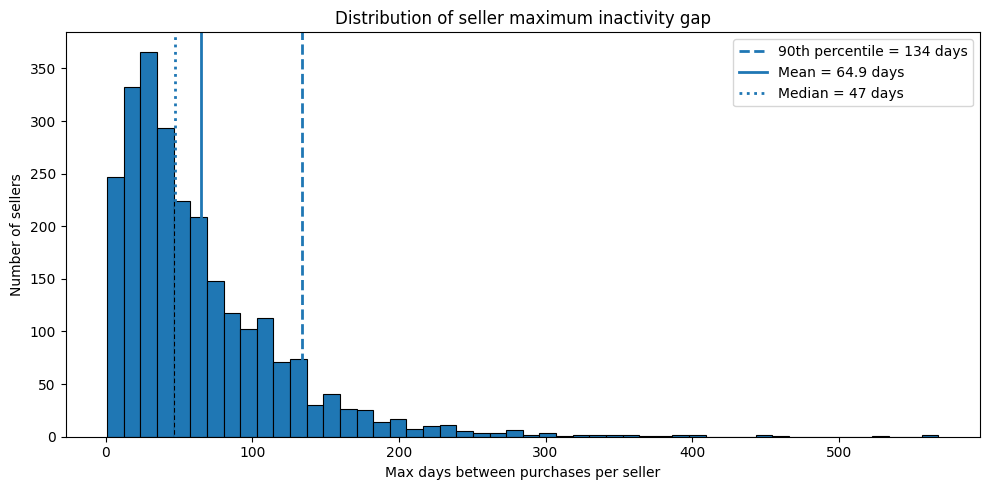

In [21]:
p = 90

seller_max_diff = (
    orders
    .loc[orders['days_since_prev'] > 0]
    .groupby('seller_id')['days_since_prev']
    .max()
    .pipe(np.ceil)
    .astype(int)
    .reset_index(name='max_days_since_prev')
)

percentile_value = np.percentile(
    seller_max_diff['max_days_since_prev'],
    p
)

mean_value = seller_max_diff['max_days_since_prev'].mean()
median_value = seller_max_diff['max_days_since_prev'].median()

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(
    seller_max_diff['max_days_since_prev'],
    bins=50,
    edgecolor='black',
    linewidth=0.8
)

ax.axvline(
    percentile_value,
    linestyle='--',
    linewidth=2,
    label=f'{p}th percentile = {int(np.ceil(percentile_value))} days'
)

ax.axvline(
    mean_value,
    linestyle='-',
    linewidth=2,
    label=f'Mean = {mean_value:.1f} days'
)

ax.axvline(
    median_value,
    linestyle=':',
    linewidth=2,
    label=f'Median = {int(median_value)} days'
)

ax.set_xlabel('Max days between purchases per seller')
ax.set_ylabel('Number of sellers')
ax.set_title('Distribution of seller maximum inactivity gap')
ax.legend()

plt.tight_layout()
plt.show()


# จำนวณวันที่เหมาะสมกับการตัด threshold ที่ประมาณ ~134 วัน ที่ 90% tile